In [1]:
import load_data
data_raw = load_data.load_FragPipe(month="Hela", contains =[])

In [2]:
new_names={}
for c in data_raw.columns.values: 
    new_names[c] = c.split(' ')[0]
data_raw.rename(columns=new_names, inplace=True)

In [3]:
data_raw.columns

Index(['0_cell_16', '0_cell_18', '0_cell_4', '100_cell_12', '100_cell_16',
       '100_cell_18', '10_cell_2', '10_cell_4', '10_cell_8', '1_cell_12',
       '1_cell_14', '1_cell_8', '500_cell_16', '500_cell_5', '500_cell_8'],
      dtype='object')

In [4]:
cols=['0_cell_16', '0_cell_18', '0_cell_4',
      '1_cell_12','1_cell_14', '1_cell_8',
      '10_cell_2', '10_cell_4', '10_cell_8', 
      '100_cell_12', '100_cell_16','100_cell_18',
      '500_cell_16', '500_cell_5', '500_cell_8']
data_raw = data_raw[cols]

In [5]:
import matplotlib.pyplot as plt
from statistics import mean
import math
from numpy import isnan
import seaborn as sns

import numpy as np
import pandas as pd

In [6]:
counts = data_raw.apply(np.count_nonzero)
counts

0_cell_16        91
0_cell_18       150
0_cell_4        164
1_cell_12       301
1_cell_14       328
1_cell_8        256
10_cell_2      1269
10_cell_4      1634
10_cell_8      1486
100_cell_12    2754
100_cell_16    2853
100_cell_18    2543
500_cell_16    3389
500_cell_5     3354
500_cell_8     3556
dtype: int64

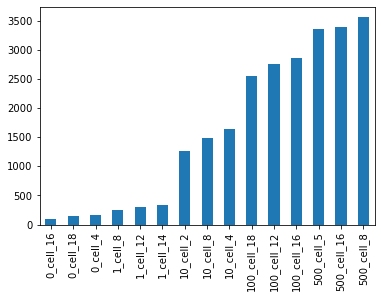

In [8]:
counts.sort_values().plot.bar()

In [9]:
cell_types = ['0_cell','1_cell','10_cell','100_cell','500_cell']
colors = ['#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if s.startswith(cell_type))
    print(cell_type)
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)

0_cell
1_cell
10_cell
100_cell
500_cell


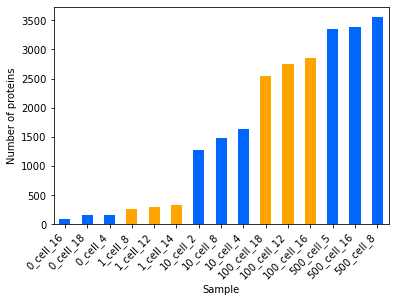

In [10]:
fig = counts.sort_values().plot.bar(color=color_by_type)
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of proteins")
#plt.show()
plt.savefig('data/Hela/col_counts.png', dpi=300, bbox_inches='tight')

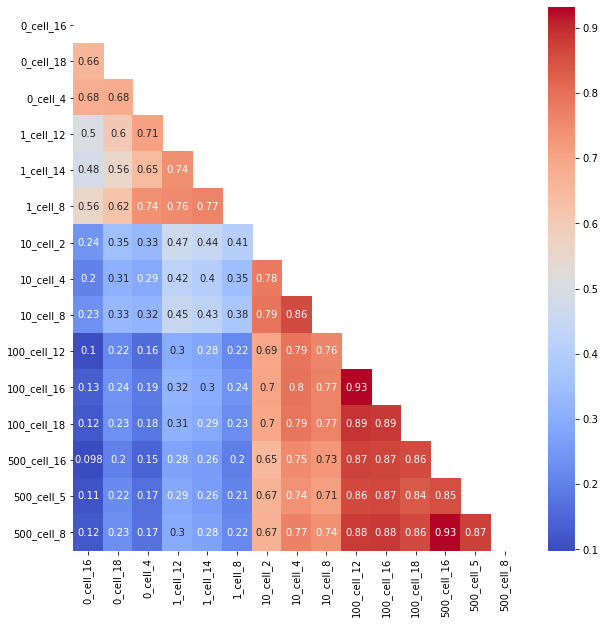

In [15]:
correlations = data_raw.corr(method="spearman")


import numpy as np
mask = np.zeros(correlations.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True


fig = plt.figure(figsize=(10,10)) 
sns.heatmap(correlations, cmap = 'coolwarm', mask = mask, annot=True)

plt.savefig("data/Hela/correlations_hela.png", dpi=300,
            bbox_inches='tight')